In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from IPython.display import display
from abc import ABC, abstractmethod
from scipy.spatial import cKDTree # Para otimização do 1-NN
from typing import Dict, List, Tuple, Any
from compara_todos import compara_todos 

# Testes

In [2]:
Nr = 50      # Número de rodadas
Ptrain = 80  # Percentual de treino

--- CARREGANDO DADOS DE 'recfaces400PCA98var_boxcox.dat' ---

--- INICIANDO AVALIAÇÃO DOS CLASSIFICADORES (50 repetições, 80% treino) ---
Avaliando: QDA (Quadrático)...
Classificador: QDA (Quadrático)
Executando QDA...
Finalizado: QDA. Acurácia Média: 2.48%
Avaliando: Variante 1 (Tikhonov λ=0.01)...
Classificador: Variante 1 (Tikhonov λ=0.01)
Executando QDA...
Finalizado: QDA. Acurácia Média: 86.18%
Avaliando: Variante 2 (Covariance Pooled)...
Classificador: Variante 2 (Covariance Pooled)
Executando QDA...
Finalizado: QDA. Acurácia Média: 96.48%
Avaliando: Variante 3 (Friedman λ=0.5)...
Classificador: Variante 3 (Friedman λ=0.5)
Executando QDA...
Finalizado: QDA. Acurácia Média: 90.67%
Avaliando: Variante 4 (Naive Bayes)...
Classificador: Variante 4 (Naive Bayes)
Executando QDA...
Finalizado: QDA. Acurácia Média: 73.33%
Avaliando: MaxCorr...
Classificador: MaxCorr
Executando MaxCorr...
Finalizado: MaxCorr. Acurácia Média: 85.70%
Avaliando: DMC...
Classificador: DMC
Executando DMC...
Fi

,Média (%),Mínimo (%),Máximo (%),Mediana (%),Desvio Padrão,Tempo (s)
QDA (Quadrático),2.48,0.00,9.09,3.03,2.82,0.19
Variante 1 (Tikhonov λ=0.01),86.18,69.70,96.97,87.88,5.49,0.19
Variante 2 (Covariance Pooled),96.48,81.82,100.00,96.97,4.55,0.27
Variante 3 (Friedman λ=0.5),90.67,78.79,96.97,90.91,4.15,0.30
Variante 4 (Naive Bayes),73.33,51.52,87.88,72.73,7.88,0.19
MaxCorr,85.70,69.70,100.00,86.36,6.53,0.02
DMC,87.45,72.73,100.00,87.88,5.00,0.03
1-NN,90.36,78.79,100.00,90.91,5.77,0.05


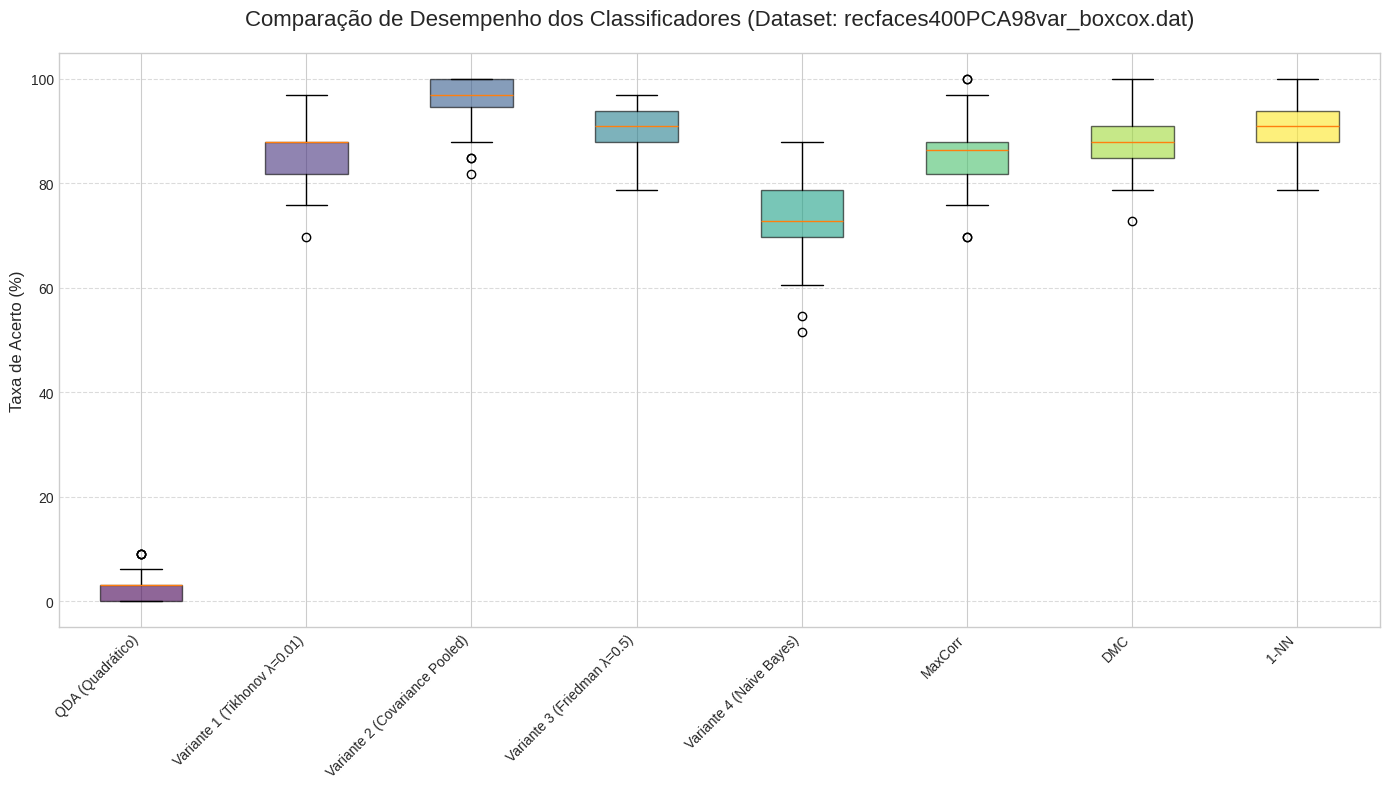

In [3]:
results = compara_todos('recfaces400PCA98var_boxcox.dat', Nr, Ptrain)

In [4]:
model_names = [
    "QDA (Quadrático)",
    "Variante 1 (Tikhonov λ=0.01)",
    "Variante 2 (Covariance Pooled)",
    "Variante 3 (Friedman λ=0.5)",
    "Variante 4 (Naive Bayes)"
]

for model in model_names:
    print(f"Postos das matrizes de covariância para {model}:")
    for i in results[1]["QDA (Quadrático)"]["model_params"]["covariances"]:
        print(np.linalg.matrix_rank(results[1][model]["model_params"]["covariances"][i]))

Postos das matrizes de covariância para QDA (Quadrático):
9
9
7
7
8
6
8
6
9
8
8
7
9
6
5
Postos das matrizes de covariância para Variante 1 (Tikhonov λ=0.01):
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
Postos das matrizes de covariância para Variante 2 (Covariance Pooled):
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
Postos das matrizes de covariância para Variante 3 (Friedman λ=0.5):
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
Postos das matrizes de covariância para Variante 4 (Naive Bayes):
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
